In [1]:
from pyspark.sql import SparkSession
from logging_handler import logger
try:
    appName = "PySpark hive Facebook Data"
    master = "local"
    spark = SparkSession.builder.master(master).appName(appName).enableHiveSupport().getOrCreate()

except Exception as e:
    logger.info(e)

2021-09-30 09:36:13,169 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


# LOADING FILE FROM HDFS TO SPARK DATAFRAME AND CREATING A VIEW

In [ ]:
df = spark.read.csv("hdfs://localhost:9000/Sample/facebook.csv",header=True)
df.createOrReplaceTempView("data")

# CREATING HIVE TABLE FROM VIEW CREATED ABOVE

In [ ]:
try:
    spark.sql("create table default.facebook_data as select * from data")
except Exception as e:
    logger.info(e)

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# SPARK + HIVE 

In [3]:
df=spark.sql("use default")

2021-09-30 09:37:01,113 WARN conf.HiveConf: HiveConf of name hive.metastore.wm.default.pool.size does not exist
2021-09-30 09:37:01,114 WARN conf.HiveConf: HiveConf of name hive.llap.task.scheduler.preempt.independent does not exist
2021-09-30 09:37:01,114 WARN conf.HiveConf: HiveConf of name hive.llap.output.format.arrow does not exist
2021-09-30 09:37:01,114 WARN conf.HiveConf: HiveConf of name hive.tez.llap.min.reducer.per.executor does not exist
2021-09-30 09:37:01,114 WARN conf.HiveConf: HiveConf of name hive.arrow.root.allocator.limit does not exist
2021-09-30 09:37:01,114 WARN conf.HiveConf: HiveConf of name hive.vectorized.use.checked.expressions does not exist
2021-09-30 09:37:01,114 WARN conf.HiveConf: HiveConf of name hive.tez.dynamic.semijoin.reduction.for.mapjoin does not exist
2021-09-30 09:37:01,114 WARN conf.HiveConf: HiveConf of name hive.vectorized.complex.types.enabled does not exist
2021-09-30 09:37:01,114 WARN conf.HiveConf: HiveConf of name hive.server2.wm.worker.

In [5]:

fb_data_hive=spark.sql("select * from default.facebook_data")
fb_data_hive.show()

+-------+---+-------+--------+---------+------+------+------------+---------------------+-----+--------------+------------+---------------------+---------+------------------+
| userid|age|dob_day|dob_year|dob_month|gender|tenure|friend_count|friendships_initiated|likes|likes_received|mobile_likes|mobile_likes_received|www_likes|www_likes_received|
+-------+---+-------+--------+---------+------+------+------------+---------------------+-----+--------------+------------+---------------------+---------+------------------+
|2094382| 14|     19|    1999|       11|  male|   266|           0|                    0|    0|             0|           0|                    0|        0|                 0|
|1192601| 14|      2|    1999|       11|female|     6|           0|                    0|    0|             0|           0|                    0|        0|                 0|
|2083884| 14|     16|    1999|       11|  male|    13|           0|                    0|    0|             0|           0|  

In [6]:
count_age_above_25 = spark.sql("select count(''),age from default.facebook_data where age >25 group By age")
count_age_above_25.show()

+-------+---+
|count()|age|
+-------+---+
|    971| 51|
|    951| 54|
|    157|101|
|   1936| 29|
|    460| 69|
|    835| 42|
|     18|112|
|    330| 73|
|     42| 87|
|    709| 64|
|   1716| 30|
|    202|113|
|   1257| 34|
|    834| 59|
|   2364| 28|
|     83| 85|
|   1175| 35|
|    995| 52|
|    352| 71|
|     93| 98|
+-------+---+
only showing top 20 rows



# AGE GROUP 20-30

In [7]:
TT_df=spark.sql("select * from default.facebook_data where age >= 20 and age <= 30")
TT_df.show()

+-------+---+-------+--------+---------+------+------+------------+---------------------+-----+--------------+------------+---------------------+---------+------------------+
| userid|age|dob_day|dob_year|dob_month|gender|tenure|friend_count|friendships_initiated|likes|likes_received|mobile_likes|mobile_likes_received|www_likes|www_likes_received|
+-------+---+-------+--------+---------+------+------+------------+---------------------+-----+--------------+------------+---------------------+---------+------------------+
|2099593| 20|     14|    1993|       11|  male|   294|           0|                    0|    0|             0|           0|                    0|        0|                 0|
|1209993| 20|     26|    1993|       11|  male|   159|           0|                    0|    0|             0|           0|                    0|        0|                 0|
|1202760| 20|     22|    1993|       11|  male|    24|           0|                    0|    0|             0|           0|  

# GROUP BY GENDER

In [8]:
spark.sql("select count(*) from facebook_data group by gender").show()

+--------+
|count(1)|
+--------+
|     175|
|   40254|
|   58574|
+--------+



# FINDING TOTAL USERS

In [9]:
total_users = spark.sql("select count(*) as total_user from default.facebook_data")
total_users.show()

+----------+
|total_user|
+----------+
|     99003|
+----------+



# FRIENDS BY GENDER

In [10]:
friends_by_gender = spark.sql("select gender,avg(friend_count) as friend_count from default.facebook_data group by gender")
friends_by_gender.show()

+------+------------------+
|gender|      friend_count|
+------+------------------+
|    NA|184.41142857142856|
|female|241.96994087544095|
|  male|165.03545941885477|
+------+------------------+



# YOUNG, OLD PEOPLE LIKES

In [11]:
young = spark.sql("select avg(likes_received) as young_people_likes from default.facebook_data where age>=13 and age < 35")
old = spark.sql("select avg(likes_received) as old_people_likes from default.facebook_data where age >= 35")
young.show()
old.show()

+------------------+
|young_people_likes|
+------------------+
|168.13453529795453|
+------------------+

+------------------+
|  old_people_likes|
+------------------+
|103.89021217994491|
+------------------+



# BIRTHDAY MONTHS COUNT

In [12]:
birthday_month_count = spark.sql("select dob_month,count(*) as birthday_month_count from default.facebook_data group by dob_month")
birthday_month_count.show()

+---------+--------------------+
|dob_month|birthday_month_count|
+---------+--------------------+
|        7|                8021|
|       11|                7205|
|        3|                8110|
|        8|                8266|
|        5|                8271|
|        6|                7607|
|        9|                7939|
|        1|               11772|
|       10|                8476|
|        4|                7810|
|       12|                7894|
|        2|                7632|
+---------+--------------------+



# YOUNG PEOPLE TYPES OF LIKES RECIEVED WEB OR MOBILE

In [13]:
young_choice = spark.sql("select avg(mobile_likes_received) as mobile_uses,avg(www_likes_received) as computer_uses from default.facebook_data where age >= 13 and age < 35")
young_choice.show()

+------------------+-----------------+
|       mobile_uses|    computer_uses|
+------------------+-----------------+
|101.67734274389122|66.45714237928786|
+------------------+-----------------+



# OLD PEOPLE TYPES OF LIKES RECIEVED WEB OR MOBILE

In [14]:
old_choice = spark.sql("select avg(mobile_likes_received) as mobile_uses,avg(www_likes_received) as computer_uses from default.facebook_data where age>= 35")
old_choice.show()

+-----------------+------------------+
|      mobile_uses|     computer_uses|
+-----------------+------------------+
|57.34956135876772|46.540625318779966|
+-----------------+------------------+



# PROCCESSING AND PLOTTING WITH PANDAS AND MATPLOTLIB

# LOADING DATASET FROM CSV FILE TO PANDAS DATAFRAME

In [15]:
fb_data = pd.read_csv("/home/ubuntu/Downloads/facebook.csv")

# FILLING NA VALUES WITH INTERPOLATE

In [16]:
clean_fb_data = fb_data.replace('NA', np.nan)

In [17]:
clean_fb_data["gender"].interpolate(method='pad',limit=1,inplace=True)


In [18]:
clean_fb_data['gender'].value_counts()/clean_fb_data.shape[0]*100

male      59.25275
female    40.74725
Name: gender, dtype: float64

In [19]:
clean_fb_data.isna().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   2
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

# DROOPPING NULL VALUES

In [20]:
clean_fb_data.dropna(inplace=True)

In [21]:
clean_fb_data

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756


# VISUALIZING LIKE COUNT BY GENDER

In [22]:
likes_count=clean_fb_data.groupby(["gender"])["likes_received"].sum()

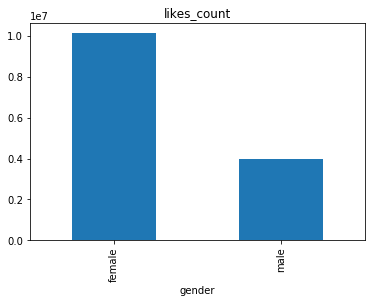

In [23]:
likes_count.plot.bar(x='gender',title='likes_count')
plt.show()

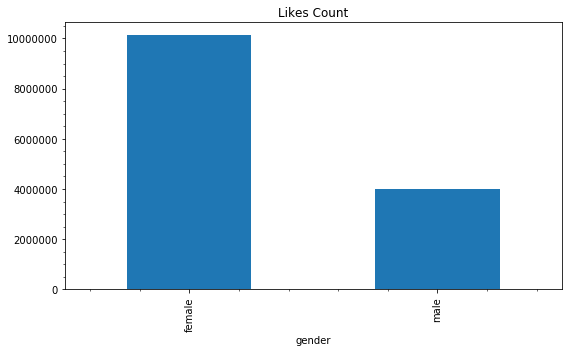

In [24]:
f = plt.figure(figsize=(8,5))
plt.ticklabel_format(style = 'plain')
likes_count.plot.bar()
plt.title("Likes Count")
plt.minorticks_on()
plt.tight_layout()

# VISUALIZATION WITH AGE GROUPS

In [ ]:
import numpy as np
import seaborn as sns
plt.style.use("fivethirtyeight")

In [ ]:
min(clean_fb_data['age']), max(clean_fb_data['age'])

In [ ]:
lables = ['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
clean_fb_data['age_group'] = pd.cut(clean_fb_data['age'], bins = np.arange(10, 121, 10), labels = lables, right=True)
clean_fb_data.head(5)

In [ ]:

plt.subplots(figsize = (10,8))
sns.histplot(clean_fb_data, x = 'age_group', multiple="dodge", shrink = 0.6)
plt.xticks(rotation=45)
plt.show()

# GENDER WISE ANALYSIS

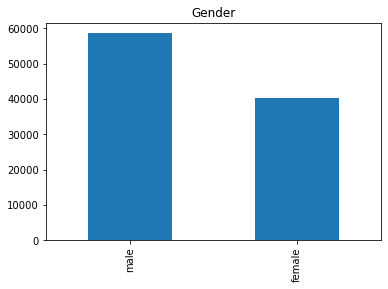

In [25]:
clean_fb_data['gender'].value_counts().plot(kind='bar', title='Gender')

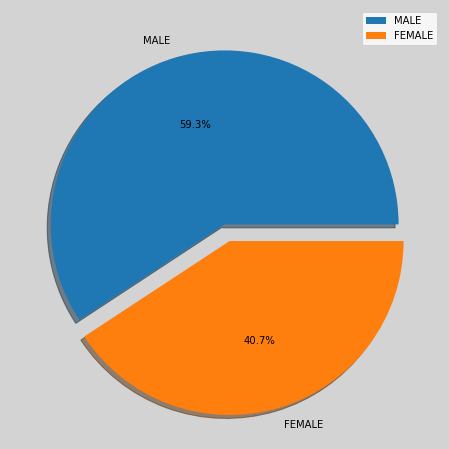

In [26]:
gender_counts = clean_fb_data['gender'].value_counts()
fig,ax=plt.subplots(figsize=(10,8))
fig.set_facecolor('lightgrey')
explode=[0,0.1]
plt.pie(gender_counts, labels = ['MALE','FEMALE'], autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend()
plt.show()

# INACTIVE USERS ANALYSIS

In [28]:
import seaborn as sns

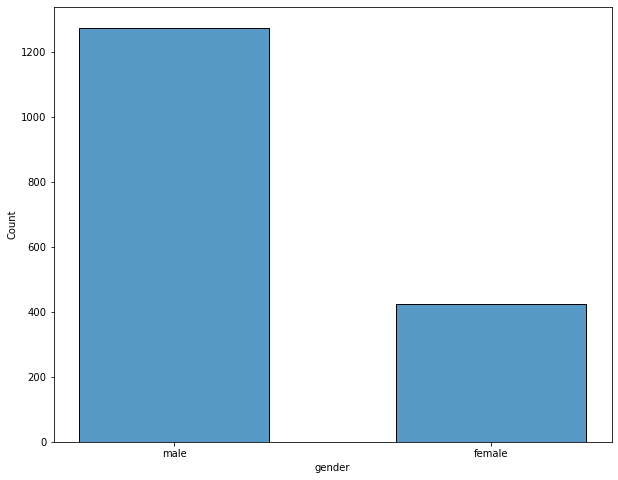

In [29]:
inactive_users = clean_fb_data.query('friend_count == 0 and friendships_initiated == 0 and likes == 0')
plt.subplots(figsize = (10,8))
sns.histplot(data = inactive_users, x = 'gender', shrink = 0.6)
plt.show()

# WEB AND MOBILE USERS

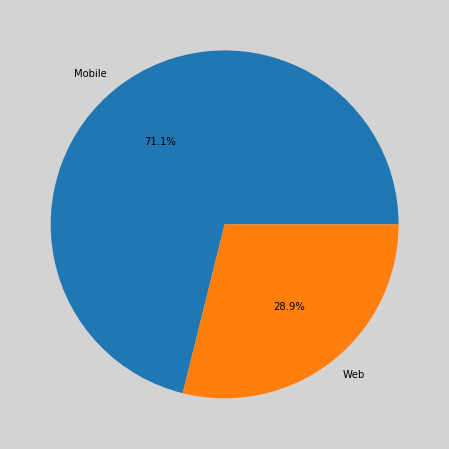

In [30]:
active_users = clean_fb_data.query("friendships_initiated !=0 and likes != 0").reset_index(drop=True)
# get wich platform they are using
active_users['use_method'] = (active_users['mobile_likes'] >= active_users['www_likes']).replace({True : 'mobile', False : 'web'})

# plot it
fig,ax=plt.subplots(figsize = (10,8))
fig.set_facecolor('lightgrey')
plt.pie(active_users['use_method'].value_counts(), labels = ['Mobile','Web'], autopct='%1.1f%%')
plt.show()